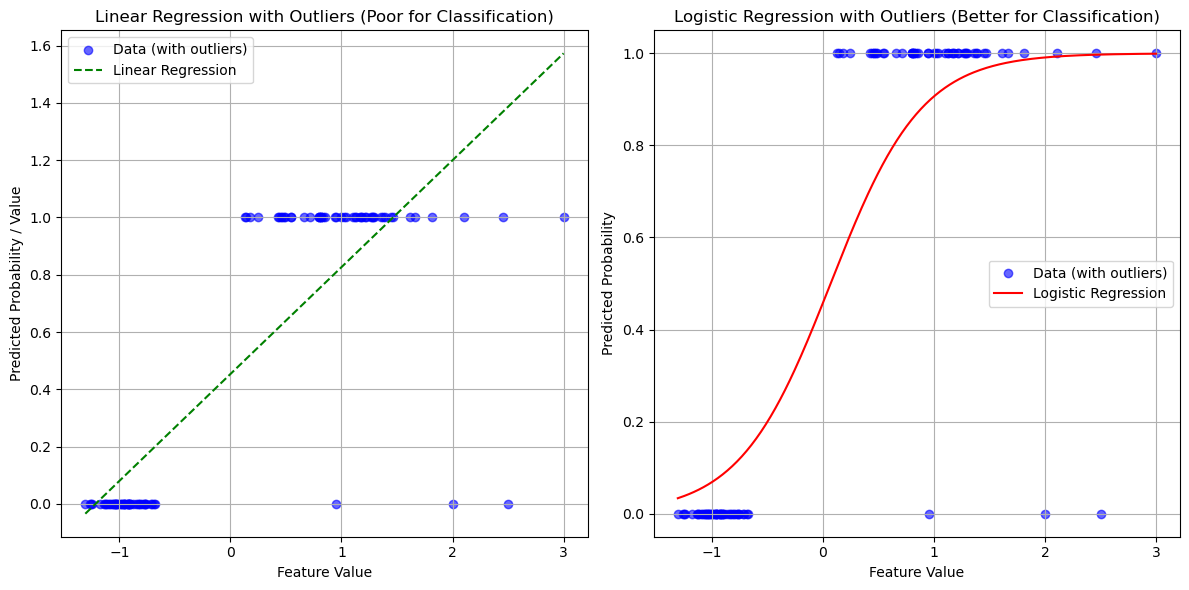

In [1]:
# Let's generate a dataset and add outliers to demonstrate how they affect Linear Regression in classification
# and how Logistic Regression handles it.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a classification dataset with some noise and imbalance to mimic a real-world problem
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Introduce outliers by adding extreme values
outliers_X = np.array([[2], [2.5], [3]])
outliers_y = np.array([0, 0, 1])

# Append outliers to the original dataset
X_with_outliers = np.vstack([X, outliers_X])
y_with_outliers = np.hstack([y, outliers_y])

# Train Linear and Logistic Regression models
linear_model_with_outliers = LinearRegression()
logistic_model_with_outliers = LogisticRegression()

linear_model_with_outliers.fit(X_with_outliers, y_with_outliers)
logistic_model_with_outliers.fit(X_with_outliers, y_with_outliers)

# Create test data for plotting
X_test = np.linspace(X_with_outliers.min(), X_with_outliers.max(), 300).reshape(-1, 1)
linear_preds_with_outliers = linear_model_with_outliers.predict(X_test)
logistic_preds_with_outliers = logistic_model_with_outliers.predict_proba(X_test)[:, 1]

# Plot 1: Linear Regression with outliers (problematic for classification)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_with_outliers, y_with_outliers, color='blue', label='Data (with outliers)', alpha=0.6)
plt.plot(X_test, linear_preds_with_outliers, color='green', label='Linear Regression', linestyle='--')
plt.title('Linear Regression with Outliers (Poor for Classification)')
plt.xlabel('Feature Value')
plt.ylabel('Predicted Probability / Value')
plt.legend()
plt.grid(True)

# Plot 2: Logistic Regression with outliers (more robust for classification)
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers, y_with_outliers, color='blue', label='Data (with outliers)', alpha=0.6)
plt.plot(X_test, logistic_preds_with_outliers, color='red', label='Logistic Regression')
plt.title('Logistic Regression with Outliers (Better for Classification)')
plt.xlabel('Feature Value')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


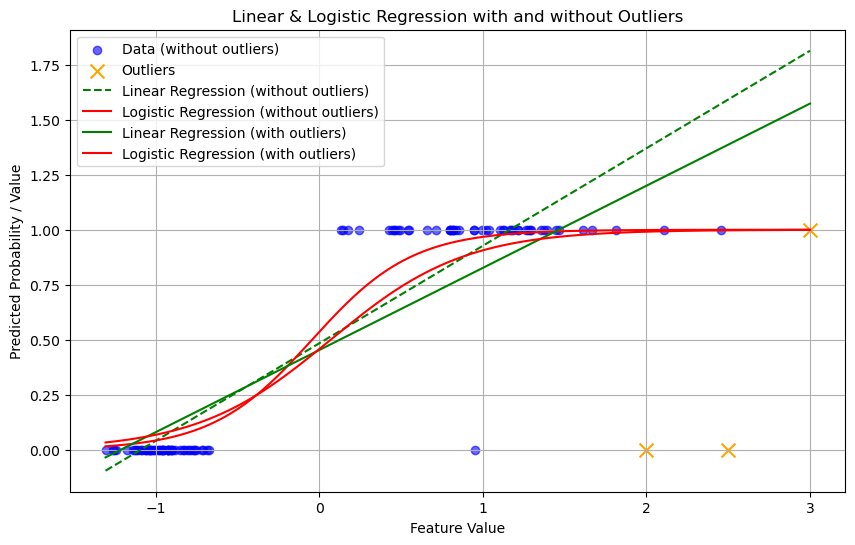

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a classification dataset
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Introduce outliers by adding extreme values
outliers_X = np.array([[2], [2.5], [3]])
outliers_y = np.array([0, 0, 1])

# Append outliers to the original dataset
X_with_outliers = np.vstack([X, outliers_X])
y_with_outliers = np.hstack([y, outliers_y])

# Train Linear and Logistic Regression models without outliers
linear_model = LinearRegression()
logistic_model = LogisticRegression()

linear_model.fit(X, y)
logistic_model.fit(X, y)

# Train Linear and Logistic Regression models with outliers
linear_model_with_outliers = LinearRegression()
logistic_model_with_outliers = LogisticRegression()

linear_model_with_outliers.fit(X_with_outliers, y_with_outliers)
logistic_model_with_outliers.fit(X_with_outliers, y_with_outliers)

# Create test data for plotting
X_test = np.linspace(X_with_outliers.min(), X_with_outliers.max(), 300).reshape(-1, 1)

# Predictions without outliers
linear_preds = linear_model.predict(X_test)
logistic_preds = logistic_model.predict_proba(X_test)[:, 1]

# Predictions with outliers
linear_preds_with_outliers = linear_model_with_outliers.predict(X_test)
logistic_preds_with_outliers = logistic_model_with_outliers.predict_proba(X_test)[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the data points (with and without outliers)
plt.scatter(X, y, color='blue', label='Data (without outliers)', alpha=0.6)
plt.scatter(outliers_X, outliers_y, color='orange', label='Outliers', marker='x', s=100)

# Plot linear regression (without outliers)
plt.plot(X_test, linear_preds, color='green', label='Linear Regression (without outliers)', linestyle='--')

# Plot logistic regression (without outliers)
plt.plot(X_test, logistic_preds, color='red', label='Logistic Regression (without outliers)')

# Plot linear regression (with outliers)
plt.plot(X_test, linear_preds_with_outliers, color='green', label='Linear Regression (with outliers)', linestyle='-')

# Plot logistic regression (with outliers)
plt.plot(X_test, logistic_preds_with_outliers, color='red', label='Logistic Regression (with outliers)', linestyle='-')

# Formatting the plot
plt.title('Linear & Logistic Regression with and without Outliers')
plt.xlabel('Feature Value')
plt.ylabel('Predicted Probability / Value')
plt.legend()
plt.grid(True)

plt.show()


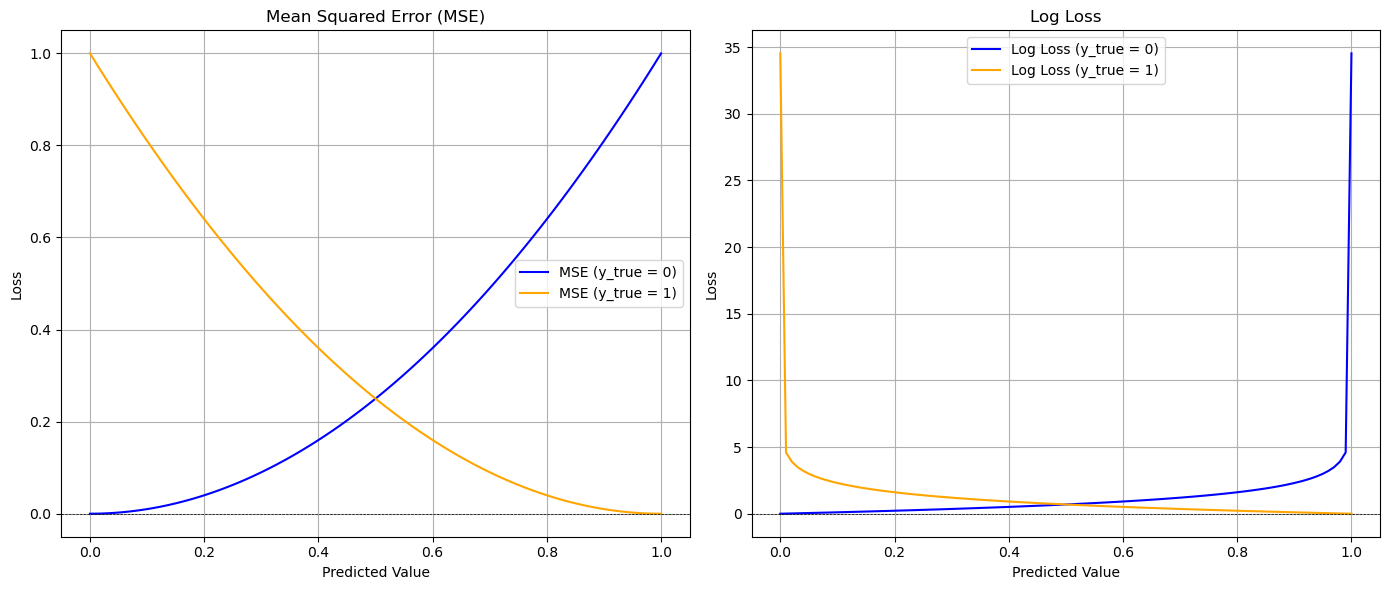

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MSE and Log Loss functions
def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

def log_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

# Generate values for predictions
y_pred = np.linspace(0, 1, 100)

# Calculate MSE and Log Loss for true label 0 and 1
mse_values_0 = mse(0, y_pred)
mse_values_1 = mse(1, y_pred)
log_loss_values_0 = log_loss(0, y_pred)
log_loss_values_1 = log_loss(1, y_pred)

# Create the plot
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(y_pred, mse_values_0, label='MSE (y_true = 0)', color='blue')
plt.plot(y_pred, mse_values_1, label='MSE (y_true = 1)', color='orange')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()

# Plot Log Loss
plt.subplot(1, 2, 2)
plt.plot(y_pred, log_loss_values_0, label='Log Loss (y_true = 0)', color='blue')
plt.plot(y_pred, log_loss_values_1, label='Log Loss (y_true = 1)', color='orange')
plt.title('Log Loss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


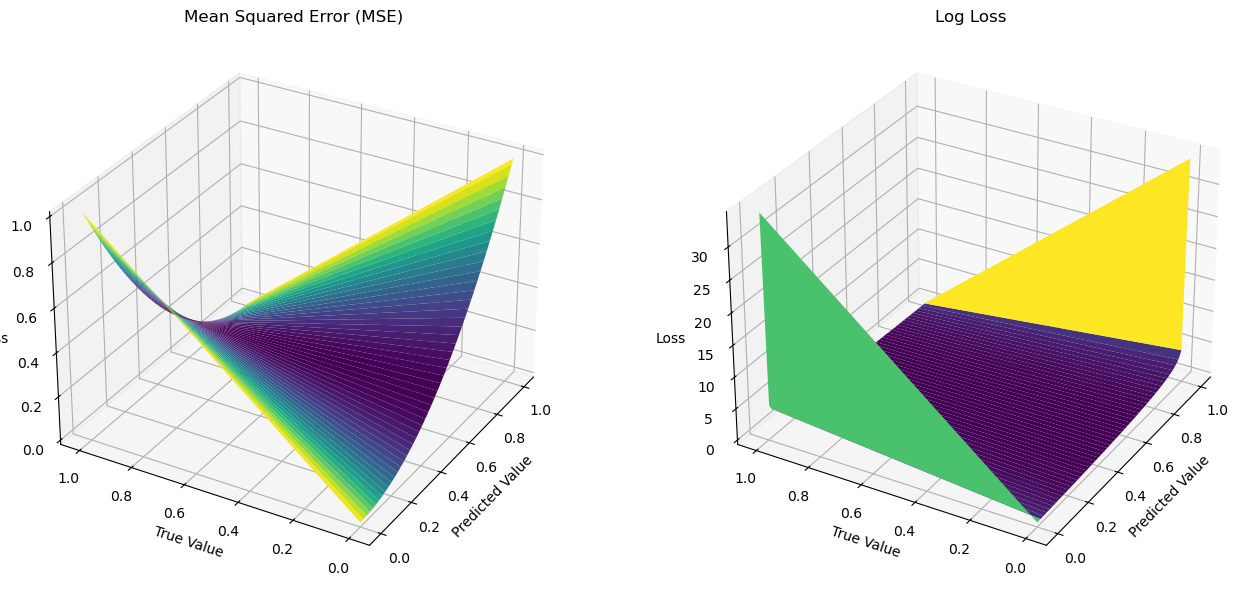

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the MSE and Log Loss functions
def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

def log_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

# Generate a meshgrid for predictions and true values
y_pred = np.linspace(0, 1, 100)
y_true = np.array([0, 1])  # True labels

Y_pred, Y_true = np.meshgrid(y_pred, y_true)

# Calculate MSE and Log Loss for the meshgrid
mse_values = mse(Y_true, Y_pred)
log_loss_values = log_loss(Y_true, Y_pred)

# Create the 3D plot
fig = plt.figure(figsize=(14, 6))

# Plot MSE
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(Y_pred, Y_true, mse_values, cmap='viridis', edgecolor='none')
ax1.set_title('Mean Squared Error (MSE)')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('True Value')
ax1.set_zlabel('Loss')
ax1.view_init(elev=30, azim=210)

# Plot Log Loss
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Y_pred, Y_true, log_loss_values, cmap='viridis', edgecolor='none')
ax2.set_title('Log Loss')
ax2.set_xlabel('Predicted Value')
ax2.set_ylabel('True Value')
ax2.set_zlabel('Loss')
ax2.view_init(elev=30, azim=210)

# Show the plot
plt.tight_layout()
plt.show()


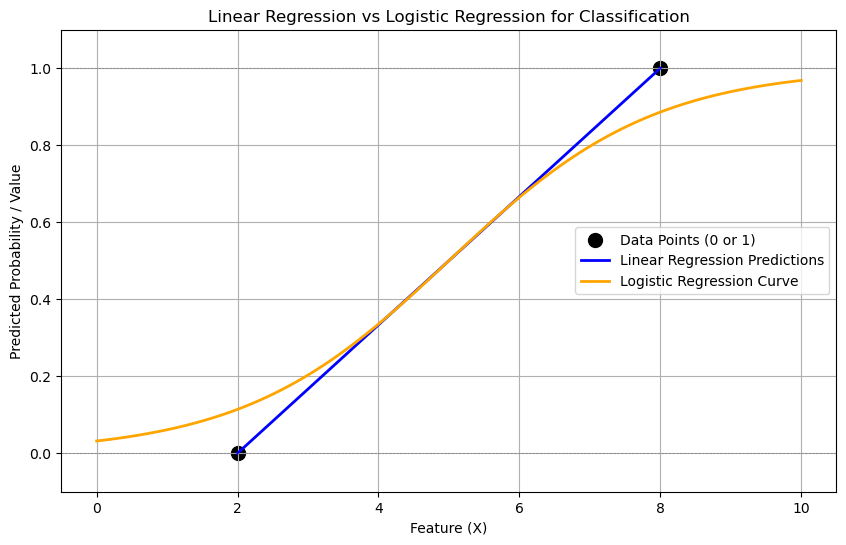

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate synthetic data (only 2 points)
X = np.array([[2], [8]])  # Feature
y = np.array([0, 1])       # Target (0 if X < 5, 1 if X >= 5)

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_predictions = linear_model.predict(X)

# Fit Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)
logistic_predictions = logistic_model.predict_proba(X)[:, 1]  # Probability of class 1

# Generate values for plotting the logistic curve
X_curve = np.linspace(0, 10, 100).reshape(-1, 1)
logistic_curve = logistic_model.predict_proba(X_curve)[:, 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X, y, color='black', label='Data Points (0 or 1)', s=100)

# Plot Linear Regression predictions
plt.plot(X, linear_predictions, color='blue', label='Linear Regression Predictions', linewidth=2)

# Plot Logistic Regression curve
plt.plot(X_curve, logistic_curve, color='orange', label='Logistic Regression Curve', linewidth=2)

# Formatting the plot
plt.title('Linear Regression vs Logistic Regression for Classification')
plt.xlabel('Feature (X)')
plt.ylabel('Predicted Probability / Value')
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axhline(1, color='gray', lw=0.5, ls='--')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid()
plt.show()
